# setup 

In [1]:
!pip install timm
import timm 
import torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 509 kB 4.8 MB/s 


In [2]:
! pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 4.7 MB/s 
     |████████████████████████████████| 4.9 MB 58.7 MB/s 
     |████████████████████████████████| 365 kB 59.9 MB/s 
     |████████████████████████████████| 1.3 MB 62.3 MB/s 
     |████████████████████████████████| 212 kB 71.6 MB/s 
     |████████████████████████████████| 120 kB 76.2 MB/s 
     |████████████████████████████████| 115 kB 75.0 MB/s 
     |████████████████████████████████| 127 kB 69.3 MB/s 
     |████████████████████████████████| 6.6 MB 54.5 MB/s 


In [3]:
# to use kaggle api #
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# kaggle API creds #
creds = '{"username":"victorbahlangene","key":"2cd1abe2f1c35ea3060e6a2f18a055ea"}'

In [5]:
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [6]:
try: import fastkaggle
except ModuleNotFoundError:
    !pip install -q fastkaggle

from fastkaggle import *

In [7]:
# competion name #
comp = 'sign-language-image-classification'

# path to where data will be downloaded #
path = setup_comp(comp, install='fastai "timm>=0.6.2.dev0"')

from fastai.vision.all import *
set_seed(42)

100%|██████████| 214M/214M [00:01<00:00, 157MB/s]


# Data analysis

In [8]:
path

Path('sign-language-image-classification')

In [9]:
path.ls()

(#4) [Path('sign-language-image-classification/train.csv'),Path('sign-language-image-classification/submit.csv'),Path('sign-language-image-classification/test.csv'),Path('sign-language-image-classification/images')]

**train csv**

In [10]:
trn_df = pd.read_csv(path/"train.csv")
trn_df

,id,label
0,b1627fb5d6af156b41c46704bc041416.jpg,8
1,bf61d61ec5f282372b76311e2594b94f.jpg,13
2,1e963951fb29f4f37d9a153e14533d80.jpg,17
3,4aec4a36181bd02af6040e3b4eef8378.jpg,14
4,78740bc6ad7b6ca6fe572a580ffa65e0.jpg,16
...,...,...
1995,ab98e8288691368429373c8ce97464bb.jpg,17
1996,8554d163909096427e3197bdfe95ab5c.jpg,7
1997,9c86ecf81893b65ee9ac478f1351ca8c.jpg,14
1998,36398d5613e8b7e5515b37d10f7b8bd9.jpg,19


In [11]:
trn_df['label'].nunique()

20

**test csv**

In [12]:
tst_df = pd.read_csv(path/"test.csv")
tst_df

,id
0,5f3540c43f86dab2c9a7c87834311ee3.jpg
1,7f14db51f1994bce42972c7fe111f5cd.jpg
2,092908960a3d4dccbe06a60b71dcdd98.jpg
3,542ed4f107f9472457b47a436ec55e60.jpg
4,c125af0d467cffe584728aad4b426d53.jpg
...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg
1502,826744d31261d3fd854b7bf93f2952c5.jpg


**Submission data format**

In [13]:
ss = pd.read_csv(path/"submit.csv")
ss

,id,predict
0,5f3540c43f86dab2c9a7c87834311ee3.jpg,NaN
1,7f14db51f1994bce42972c7fe111f5cd.jpg,NaN
2,092908960a3d4dccbe06a60b71dcdd98.jpg,NaN
3,542ed4f107f9472457b47a436ec55e60.jpg,NaN
4,c125af0d467cffe584728aad4b426d53.jpg,NaN
...,...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg,NaN
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg,NaN
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg,NaN
1502,826744d31261d3fd854b7bf93f2952c5.jpg,NaN


train images

In [14]:
trn_path = path/"images/images/train"
trn_files = get_image_files(trn_path)
trn_files

(#2000) [Path('sign-language-image-classification/images/images/train/cffbfaa8026e59785259fd6cf71dfd58.jpg'),Path('sign-language-image-classification/images/images/train/cfe558f2c38c4b3835e33b07fb656a50.jpg'),Path('sign-language-image-classification/images/images/train/722c75751ecff151ece740144aac666e.jpg'),Path('sign-language-image-classification/images/images/train/4d57ff612e5f35cb5beb7d3829605122.jpg'),Path('sign-language-image-classification/images/images/train/0f205a018d1bf382228783cfa8579ff3.jpg'),Path('sign-language-image-classification/images/images/train/7c6d4a7c1d3ba68f688c78540456dee4.jpg'),Path('sign-language-image-classification/images/images/train/4670bf85c30dfd38dd59d126017fe8fd.jpg'),Path('sign-language-image-classification/images/images/train/02a7aefd4d446a9c8d588a79091eeffc.jpg'),Path('sign-language-image-classification/images/images/train/c694539ca7f6f43b14b44eb10e0584f5.jpg'),Path('sign-language-image-classification/images/images/train/34eb11352da5b26149edb9376d5973

In [15]:
# ??PILImage.create

(741, 813)


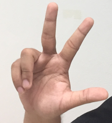

In [16]:
img = PILImage.create(trn_files[0])
print(img.size)

img.to_thumb(123)

**ImageDataLoaders**

In [17]:
# ??ImageDataLoaders.from_folder

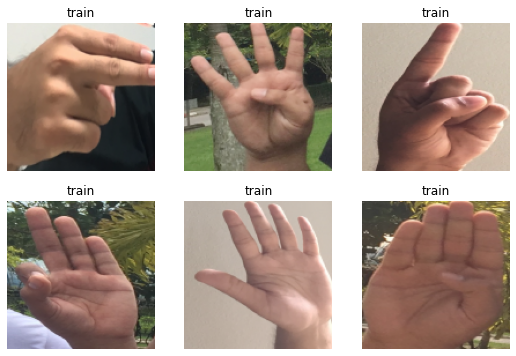

In [18]:
dls = ImageDataLoaders.from_folder(trn_path, valid_pct=0.2, seed=42,
      item_tfms=Resize(480, method='squish'),
    batch_tfms=aug_transforms(size=128, min_scale=0.75))

dls.show_batch(max_n = 6)

need a datablock because **get_y** func is different. need a custom func

In [19]:
trn_df.head()

,id,label
0,b1627fb5d6af156b41c46704bc041416.jpg,8
1,bf61d61ec5f282372b76311e2594b94f.jpg,13
2,1e963951fb29f4f37d9a153e14533d80.jpg,17
3,4aec4a36181bd02af6040e3b4eef8378.jpg,14
4,78740bc6ad7b6ca6fe572a580ffa65e0.jpg,16


In [20]:
def get_x(r): return r["id"]
def get_y(r): return r["label"]

In [21]:
get_x(trn_df)[0], get_y(trn_df)[0]

('b1627fb5d6af156b41c46704bc041416.jpg', 8)

In [22]:
# ??DataBlock

In [23]:
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(trn_df)
dsets.train[0]


('ee799a12ba8aa87f77af44183c77807c.jpg', 14)

In [24]:
(path/"images/images/train").ls()

(#2000) [Path('sign-language-image-classification/images/images/train/cffbfaa8026e59785259fd6cf71dfd58.jpg'),Path('sign-language-image-classification/images/images/train/cfe558f2c38c4b3835e33b07fb656a50.jpg'),Path('sign-language-image-classification/images/images/train/722c75751ecff151ece740144aac666e.jpg'),Path('sign-language-image-classification/images/images/train/4d57ff612e5f35cb5beb7d3829605122.jpg'),Path('sign-language-image-classification/images/images/train/0f205a018d1bf382228783cfa8579ff3.jpg'),Path('sign-language-image-classification/images/images/train/7c6d4a7c1d3ba68f688c78540456dee4.jpg'),Path('sign-language-image-classification/images/images/train/4670bf85c30dfd38dd59d126017fe8fd.jpg'),Path('sign-language-image-classification/images/images/train/02a7aefd4d446a9c8d588a79091eeffc.jpg'),Path('sign-language-image-classification/images/images/train/c694539ca7f6f43b14b44eb10e0584f5.jpg'),Path('sign-language-image-classification/images/images/train/34eb11352da5b26149edb9376d5973

In [25]:
def get_x(r): return path/"images/images/train"/r["id"]
def get_y(r): return r["label"]

In [26]:
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(trn_df)
dsets.train[0]

(Path('sign-language-image-classification/images/images/train/490dcea0087233dfd3895c4d1ee6fd5c.jpg'),
 19)

In [27]:
# ??DataBlock

In [28]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
    get_x = get_x, get_y = get_y)

dsets = dblock.datasets(trn_df)
dsets.train[0]

(PILImage mode=RGB size=305x301, TensorCategory(5))

In [29]:
dsets.vocab

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

thought of changing the target label to *str* form *int*. Not required.

In [30]:
# trn_df.dtypes

In [31]:
# data_types_dict = {'label': str}

# trn_df = trn_df.astype(data_types_dict)
# trn_df.dtypes


In [32]:
# dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
#     get_x = get_x, get_y = get_y)

# dsets = dblock.datasets(trn_df)
# dsets.train[0]

In [33]:
# dsets.vocab

In [34]:
doc(DataBlock)

DataBlock(blocks: 'list' = None, dl_type: 'TfmdDL' = None, getters: 'list' = None, n_inp: 'int' = None, item_tfms: 'list' = None, batch_tfms: 'list' = None, *, get_items=None, splitter=None, get_y=None, get_x=None)
Generic container to quickly build `Datasets` and `DataLoaders`.

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [35]:
# DataBlock (blocks:list=None, dl_type:TfmdDL=None, getters:list=None,
#             n_inp:int=None, item_tfms:list=None, batch_tfms:list=None,
#             get_items=None, splitter=None, get_y=None, get_x=None)

In [36]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms=Resize(480, method='squish'),
                   batch_tfms=aug_transforms(size=128, min_scale=0.75))

dls = dblock.dataloaders(trn_df)

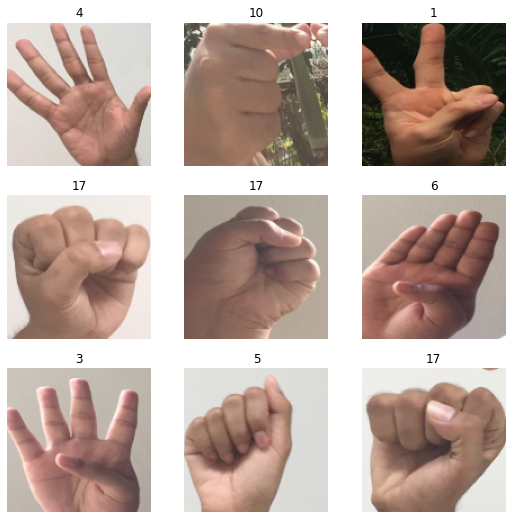

In [37]:
dls.show_batch()

## 1.Model

In [38]:
doc(vision_learner)

vision_learner(dls, arch, normalize=True, n_out=None, pretrained=True, loss_func=None, opt_func=<function Adam at 0x7f8e342e7050>, lr=0.001, splitter=None, cbs=None, metrics=None, path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95, 0.85, 0.95), cut=None, init=<function kaiming_normal_ at 0x7f8e51008710>, custom_head=None, concat_pool=True, pool=True, lin_ftrs=None, ps=0.5, first_bn=True, bn_final=False, lin_first=False, y_range=None, *, n_in=3)
Build a vision learner from `dls` and `arch`

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [39]:
learn = vision_learner(dls, "resnet26d", metrics=accuracy, path=".").to_fp16()

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/resnet26d-69e92c46.pth" to /root/.cache/torch/hub/checkpoints/resnet26d-69e92c46.pth


learning rate

In [40]:
# ??learn.lr_find

SuggestedLRs(valley=0.0010000000474974513, slide=0.0010000000474974513)

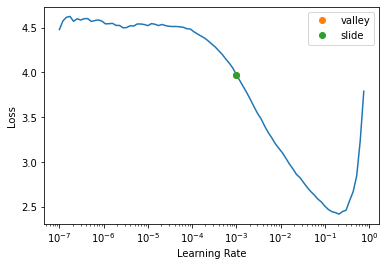

In [41]:
learn.lr_find(suggest_funcs=(valley, slide))

In [42]:
learn.fine_tune(3, 0.001)

epoch,train_loss,valid_loss,accuracy,time
0,3.055234,0.928996,0.700000,00:26


epoch,train_loss,valid_loss,accuracy,time
0,1.109812,0.653546,0.782500,00:25
1,0.939899,0.535047,0.825000,00:24
2,0.768519,0.520300,0.825000,00:24


### submit


**test images**

In [43]:
(path/"images/images/test").ls()

(#1504) [Path('sign-language-image-classification/images/images/test/a5f726521c59335ec1916dbf9fc18bbe.jpg'),Path('sign-language-image-classification/images/images/test/51e584d4e9beee6cd393eef5ed76ce14.jpg'),Path('sign-language-image-classification/images/images/test/d5e256b436bf8f312a553387a793d432.jpg'),Path('sign-language-image-classification/images/images/test/96cb3100bf5c033246a2cbee447245b1.jpg'),Path('sign-language-image-classification/images/images/test/38df9bc7dc48c86f789bdc4d4e2391ac.jpg'),Path('sign-language-image-classification/images/images/test/9638c17e42a728262a72543b1bedd576.jpg'),Path('sign-language-image-classification/images/images/test/b2a866d71897c7625235ec1e7f767d47.jpg'),Path('sign-language-image-classification/images/images/test/0598c5bd6d54bb7d9e3b7ece979a118c.jpg'),Path('sign-language-image-classification/images/images/test/e62521709164e2eba0b73088f7ecf40c.jpg'),Path('sign-language-image-classification/images/images/test/348493e0cc360e236e5e748691527347.jpg')..

In [44]:
tst_files = get_image_files(path/"images/images/test")

In [45]:
tst_files.sort()

In [46]:
tst_files

(#1504) [Path('sign-language-image-classification/images/images/test/003a97d7ca88c5fe85b7b2d812705f10.jpg'),Path('sign-language-image-classification/images/images/test/0050374d197dd3cf0c112ca1d871a12f.jpg'),Path('sign-language-image-classification/images/images/test/0072b156fd15cc20fe1ad4d33c54902c.jpg'),Path('sign-language-image-classification/images/images/test/0085e3a04af015b51b0c6ddf81638ee9.jpg'),Path('sign-language-image-classification/images/images/test/008ff2af62e264c4b04799faef6e2a8e.jpg'),Path('sign-language-image-classification/images/images/test/009cfd592acb43f9bdb5d18b81b2804c.jpg'),Path('sign-language-image-classification/images/images/test/00bdffc5fa8920a8009adfd47ab6851c.jpg'),Path('sign-language-image-classification/images/images/test/00d134dadbc2f1896873aba12801d604.jpg'),Path('sign-language-image-classification/images/images/test/00dc759fa72b37dab0ea5641ff90180b.jpg'),Path('sign-language-image-classification/images/images/test/00eb1ee095a182502c371f6031af1144.jpg')..

# Sort test images so that they match the `test.csv` order, or sort the `test.csv` to match the test images order.

In [47]:
ss

,id,predict
0,5f3540c43f86dab2c9a7c87834311ee3.jpg,NaN
1,7f14db51f1994bce42972c7fe111f5cd.jpg,NaN
2,092908960a3d4dccbe06a60b71dcdd98.jpg,NaN
3,542ed4f107f9472457b47a436ec55e60.jpg,NaN
4,c125af0d467cffe584728aad4b426d53.jpg,NaN
...,...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg,NaN
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg,NaN
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg,NaN
1502,826744d31261d3fd854b7bf93f2952c5.jpg,NaN


In [48]:
ss_test_sort = ss.copy() 

In [49]:
ss_test_sort.dtypes

id          object
predict    float64
dtype: object

In [51]:
ss_test_sort.columns

Index(['id', 'predict'], dtype='object')

In [52]:
ss_test_sort.id

0       5f3540c43f86dab2c9a7c87834311ee3.jpg
1       7f14db51f1994bce42972c7fe111f5cd.jpg
2       092908960a3d4dccbe06a60b71dcdd98.jpg
3       542ed4f107f9472457b47a436ec55e60.jpg
4       c125af0d467cffe584728aad4b426d53.jpg
                        ...                 
1499    480bd34d7aaddb2f15d897f6fa938a1a.jpg
1500    610ecbaf1f77fcbd8dda0f664c084769.jpg
1501    f9e8adc8f33ef85d7ece4220537e9fec.jpg
1502    826744d31261d3fd854b7bf93f2952c5.jpg
1503    e8a6b045eed20827cbeaddf4537de62c.jpg
Name: id, Length: 1504, dtype: object

In [53]:
ss_test_sort['id'].sort_values(ascending=True)

1296    003a97d7ca88c5fe85b7b2d812705f10.jpg
834     0050374d197dd3cf0c112ca1d871a12f.jpg
634     0072b156fd15cc20fe1ad4d33c54902c.jpg
1410    0085e3a04af015b51b0c6ddf81638ee9.jpg
931     008ff2af62e264c4b04799faef6e2a8e.jpg
                        ...                 
927     ff70c770641d8b6062a666ad07030762.jpg
157     ff8469ea510473a3c4ac271e82d15a87.jpg
41      ff8799c16f7ec6e704ee8f29d8dfdcb7.jpg
1032    ffa44bfbce1fdecd9302524a6cd9bb37.jpg
288     ffce51595729346e9cd77900b2a9d66f.jpg
Name: id, Length: 1504, dtype: object

In [54]:
ss_test_sort.sort_values('id', ascending=True, inplace=True)

In [55]:
ss_test_sort

,id,predict
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,NaN
834,0050374d197dd3cf0c112ca1d871a12f.jpg,NaN
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,NaN
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,NaN
931,008ff2af62e264c4b04799faef6e2a8e.jpg,NaN
...,...,...
927,ff70c770641d8b6062a666ad07030762.jpg,NaN
157,ff8469ea510473a3c4ac271e82d15a87.jpg,NaN
41,ff8799c16f7ec6e704ee8f29d8dfdcb7.jpg,NaN
1032,ffa44bfbce1fdecd9302524a6cd9bb37.jpg,NaN


In [56]:
tst_files

(#1504) [Path('sign-language-image-classification/images/images/test/003a97d7ca88c5fe85b7b2d812705f10.jpg'),Path('sign-language-image-classification/images/images/test/0050374d197dd3cf0c112ca1d871a12f.jpg'),Path('sign-language-image-classification/images/images/test/0072b156fd15cc20fe1ad4d33c54902c.jpg'),Path('sign-language-image-classification/images/images/test/0085e3a04af015b51b0c6ddf81638ee9.jpg'),Path('sign-language-image-classification/images/images/test/008ff2af62e264c4b04799faef6e2a8e.jpg'),Path('sign-language-image-classification/images/images/test/009cfd592acb43f9bdb5d18b81b2804c.jpg'),Path('sign-language-image-classification/images/images/test/00bdffc5fa8920a8009adfd47ab6851c.jpg'),Path('sign-language-image-classification/images/images/test/00d134dadbc2f1896873aba12801d604.jpg'),Path('sign-language-image-classification/images/images/test/00dc759fa72b37dab0ea5641ff90180b.jpg'),Path('sign-language-image-classification/images/images/test/00eb1ee095a182502c371f6031af1144.jpg')..

In [57]:
tst_dl = dls.test_dl(tst_files)

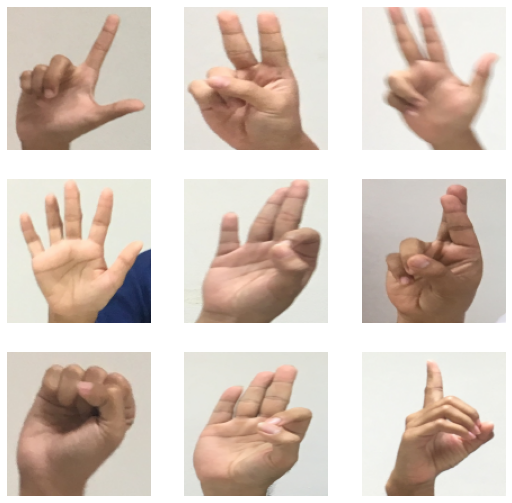

In [58]:
tst_dl.show_batch()

In [59]:
x = tst_dl.one_batch()

In [60]:
x[0].shape

torch.Size([64, 3, 128, 128])

In [61]:
x[0][0].shape

torch.Size([3, 128, 128])

In [ ]:
# ??Learner.get_preds

In [62]:
probs,_,idxs = learn.get_preds(dl=tst_dl, with_decoded=True)

In [63]:
probs[0],idxs[0],dls.vocab[idxs[0]],probs[0][idxs[0]]

(TensorBase([1.9376e-03, 1.0202e-02, 4.2003e-01, 1.2418e-03, 1.7904e-03,
             3.0811e-03, 3.1537e-04, 6.8961e-03, 1.0685e-03, 9.4415e-05,
             1.1411e-04, 1.4767e-04, 2.2605e-04, 3.9479e-04, 1.1348e-02,
             4.5416e-01, 2.8054e-03, 2.7723e-04, 1.7027e-05, 8.3848e-02]),
 TensorBase(15),
 15,
 TensorBase(0.4542))

**to_csv**

In [64]:
idxs = probs.argmax(dim=1)

In [68]:
idxs.shape

torch.Size([1504])

In [65]:
len(idxs.unique())

20

In [66]:
vocab = np.array(learn.dls.vocab)
vocab

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [69]:
results = pd.Series(vocab[idxs], name="idxs")
results

0       15
1        1
2        1
3        4
4        9
        ..
1499     4
1500     7
1501     5
1502     5
1503     0
Name: idxs, Length: 1504, dtype: int64

In [71]:
ss_test_sort.head()

,id,predict
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,NaN
834,0050374d197dd3cf0c112ca1d871a12f.jpg,NaN
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,NaN
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,NaN
931,008ff2af62e264c4b04799faef6e2a8e.jpg,NaN


In [77]:
result_values = results.values

In [79]:
ss_test_sort["predict2"] = result_values

In [80]:
ss_test_sort

,id,predict,predict2
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,10,15
834,0050374d197dd3cf0c112ca1d871a12f.jpg,11,1
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,13,1
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,2,4
931,008ff2af62e264c4b04799faef6e2a8e.jpg,17,9
...,...,...,...
927,ff70c770641d8b6062a666ad07030762.jpg,14,4
157,ff8469ea510473a3c4ac271e82d15a87.jpg,3,7
41,ff8799c16f7ec6e704ee8f29d8dfdcb7.jpg,16,5
1032,ffa44bfbce1fdecd9302524a6cd9bb37.jpg,14,5


In [82]:
ss_test_sort.drop("predict", axis=1).head()

,id,predict2
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,15
834,0050374d197dd3cf0c112ca1d871a12f.jpg,1
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,1
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,4
931,008ff2af62e264c4b04799faef6e2a8e.jpg,9


In [83]:
ss_test_sort.drop("predict", axis=1, inplace=True)

In [84]:
ss_test_sort.head()

,id,predict2
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,15
834,0050374d197dd3cf0c112ca1d871a12f.jpg,1
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,1
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,4
931,008ff2af62e264c4b04799faef6e2a8e.jpg,9


In [ ]:
df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)

In [86]:
ss_test_sort.rename(columns = {"predict2":"predict"}).head()

,id,predict
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,15
834,0050374d197dd3cf0c112ca1d871a12f.jpg,1
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,1
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,4
931,008ff2af62e264c4b04799faef6e2a8e.jpg,9


In [87]:
ss_test_sort.rename(columns = {"predict2":"predict"}, inplace =True)

In [88]:
ss_test_sort.head()

,id,predict
1296,003a97d7ca88c5fe85b7b2d812705f10.jpg,15
834,0050374d197dd3cf0c112ca1d871a12f.jpg,1
634,0072b156fd15cc20fe1ad4d33c54902c.jpg,1
1410,0085e3a04af015b51b0c6ddf81638ee9.jpg,4
931,008ff2af62e264c4b04799faef6e2a8e.jpg,9


In [91]:
ss_test_sort.sort_index(inplace=True)

In [92]:
ss_test_sort

,id,predict
0,5f3540c43f86dab2c9a7c87834311ee3.jpg,4
1,7f14db51f1994bce42972c7fe111f5cd.jpg,18
2,092908960a3d4dccbe06a60b71dcdd98.jpg,19
3,542ed4f107f9472457b47a436ec55e60.jpg,5
4,c125af0d467cffe584728aad4b426d53.jpg,3
...,...,...
1499,480bd34d7aaddb2f15d897f6fa938a1a.jpg,17
1500,610ecbaf1f77fcbd8dda0f664c084769.jpg,3
1501,f9e8adc8f33ef85d7ece4220537e9fec.jpg,9
1502,826744d31261d3fd854b7bf93f2952c5.jpg,10


In [93]:
ss_test_sort.to_csv('subm.csv', index=False)
!head subm.csv

id,predict
5f3540c43f86dab2c9a7c87834311ee3.jpg,4
7f14db51f1994bce42972c7fe111f5cd.jpg,18
092908960a3d4dccbe06a60b71dcdd98.jpg,19
542ed4f107f9472457b47a436ec55e60.jpg,5
c125af0d467cffe584728aad4b426d53.jpg,3
dac637220376b2f834447c515148e301.jpg,6
c94daf6d789e53fd933cb26cedf00678.jpg,15
559cbbb343a27ec2839477c53b0ba65b.jpg,2
4a6bd7247218fe3cd2001a634b1fd6df.jpg,13


**Submitt**

kaggle competitions submit -c **sign-language-image-classification** -f **submission.csv** -m "Message"

In [94]:

if not iskaggle:
    from kaggle import api
    api.competition_submit_cli('subm.csv', 'v3 victor rn26d 128px', comp)

100%|██████████| 58.0k/58.0k [00:01<00:00, 48.0kB/s]


Score: **0.81515**

Public score: **0.82579**

Pos: 38/41

**Submit Notebook to kaggle**

```python
push_notebook(user, id, title, file, path='.', competition=None, private=True, gpu=False, internet=True)
```

In [103]:
if not iskaggle:
  push_notebook('victorbahlangene', 'sign-language-image-classification',
                title='Sign Language Image Classification',
                file='Sign_Language_Image_Classification.ipynb',
                path=".",
                competition=comp, private=False, gpu=True)

Kernel version 1 successfully pushed.  Please check progress at https://www.kaggle.com/code/victorbahlangene/sign-language-image-classification
